In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_poisson_deviance
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.metrics import mean_tweedie_deviance

In [3]:
#Import data
data = pd.read_csv("Assignment.csv")

# transform the column names to lowercase
data.columns = data.columns.str.lower()
data = data.rename(columns= {'duree': 'expo',
                             'nbrtotan': 'freq',
                             'nbrtotc': 'nclaims', 
                             'chargtot': 'claim_amount'})
data = data.drop(['lnexpo','codposs','sexp','split'],axis=1)


In [4]:
data.head(100)

,ageph,expo,nclaims,freq,claim_amount,agecar,fuelc,usec,fleetc,sportc,coverp,powerc
0,64,1.000000,0,0.000000,0.000000,2-5,Petrol,Private,No,No,MTPL+,66-110
1,28,0.046575,1,21.470588,155.974606,6-10,Petrol,Private,No,No,MTPL,66-110
2,58,0.402740,0,0.000000,0.000000,>10,Petrol,Private,No,No,MTPL,<66
3,37,0.169863,0,0.000000,0.000000,2-5,Petrol,Professional,No,No,MTPL+++,66-110
4,29,1.000000,0,0.000000,0.000000,6-10,Petrol,Private,No,No,MTPL+,<66
...,...,...,...,...,...,...,...,...,...,...,...,...
95,49,1.000000,0,0.000000,0.000000,6-10,Petrol,Private,No,No,MTPL+,<66
96,28,1.000000,0,0.000000,0.000000,2-5,Petrol,Private,Yes,No,MTPL+++,66-110
97,29,1.000000,0,0.000000,0.000000,6-10,Petrol,Private,No,No,MTPL,66-110
98,31,0.301370,2,6.636364,3172.243858,>10,Petrol,Private,No,No,MTPL,66-110


In [5]:
# List of categorical variables
categorical_variables = ['agecar', 
                         'fuelc',
                         'usec',
                         'fleetc', 
                         'sportc',
                         'coverp',
                         'powerc']

# Encoding categorical variables one by one
pd.options.mode.copy_on_write = True
label_encoders = {}
for var in categorical_variables:
    label_encoders[var] = LabelEncoder()
    data[var] = label_encoders[var].fit_transform(data[var])

In [6]:
data.head(100)

,ageph,expo,nclaims,freq,claim_amount,agecar,fuelc,usec,fleetc,sportc,coverp,powerc
0,64,1.000000,0,0.000000,0.000000,1,1,0,0,0,1,0
1,28,0.046575,1,21.470588,155.974606,2,1,0,0,0,0,0
2,58,0.402740,0,0.000000,0.000000,3,1,0,0,0,0,1
3,37,0.169863,0,0.000000,0.000000,1,1,1,0,0,2,0
4,29,1.000000,0,0.000000,0.000000,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,49,1.000000,0,0.000000,0.000000,2,1,0,0,0,1,1
96,28,1.000000,0,0.000000,0.000000,1,1,0,1,0,2,0
97,29,1.000000,0,0.000000,0.000000,2,1,0,0,0,0,0
98,31,0.301370,2,6.636364,3172.243858,3,1,0,0,0,0,0


In [17]:
data.dtypes

ageph             int64
expo            float64
nclaims           int64
freq            float64
claim_amount    float64
agecar            int32
fuelc             int32
usec              int32
fleetc            int32
sportc            int32
coverp            int32
powerc            int32
dtype: object

In [86]:
# Features
data_with_claims = data[data['claim_amount'] > 0]
columns_all = ['expo','ageph','agecar','fuelc','usec','fleetc','sportc','coverp','powerc']
x = data_with_claims[columns_all]


# Frequency
#y = np.array(data['freq'])

#Severity 

data_with_claims['severity'] = data_with_claims['claim_amount']/data_with_claims['nclaims']

data_with_claims['lg_severity'] = np.log(data_with_claims['severity'])
y=data_with_claims['lg_severity']

print(y.mean())

6.118424706177834


In [58]:
X_train, X_test, y_train, y_test = train_test_splix, y, test_size=0.2, random_state=42)

In [59]:
columns = ['ageph','agecar','fuelc','usec','fleetc','sportc','coverp','powerc']
expo_train = X_train['expo']
X_train = X_train[columns]
expo_test = X_test['expo']
X_test = X_test[columns]


In [74]:
#Gradient Boosting Regression
model = GradientBoostingRegressor(min_samples_split= 100, min_samples_leaf = 50)

param_grid = {
    'learning_rate': np.linspace(0.01, 0.1, 5),  # Generates 5 values from 0.01 to 0.1
    'n_estimators': np.linspace(100, 300, 5, dtype=int),  # Generates 5 integer values from 100 to 300
    'subsample': np.linspace(0.6, 1.0, 5),  # Generates 5 values from 0.6 to 1.0
    'max_depth': np.linspace(3, 7, 5, dtype=int)  # Generates 5 integer values from 3 to 7
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)  # neg_mean

model.fit(X_train, y_train, sample_weight=expo_train)

# model

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
Best parameters: {'learning_rate': 0.0325, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}
Best cross-validation score (MSE): 2.1784137240200367


GradientBoostingRegressor(min_samples_leaf=50, min_samples_split=100)

In [1]:
y_pred = model.predict(X_train)
MSE_train = mean_tweedie_deviance(y_train,y_pred, sample_weight=expo_train, power=2)
print('MSE for training data:', MSE_train)

y_pred_test = model.predict(X_test)
MSE_test = mean_tweedie_deviance(y_test,y_pred_test, sample_weight=expo_test, power=2)
print('MSE for test data:', MSE_test)

NameError: name 'model' is not defined

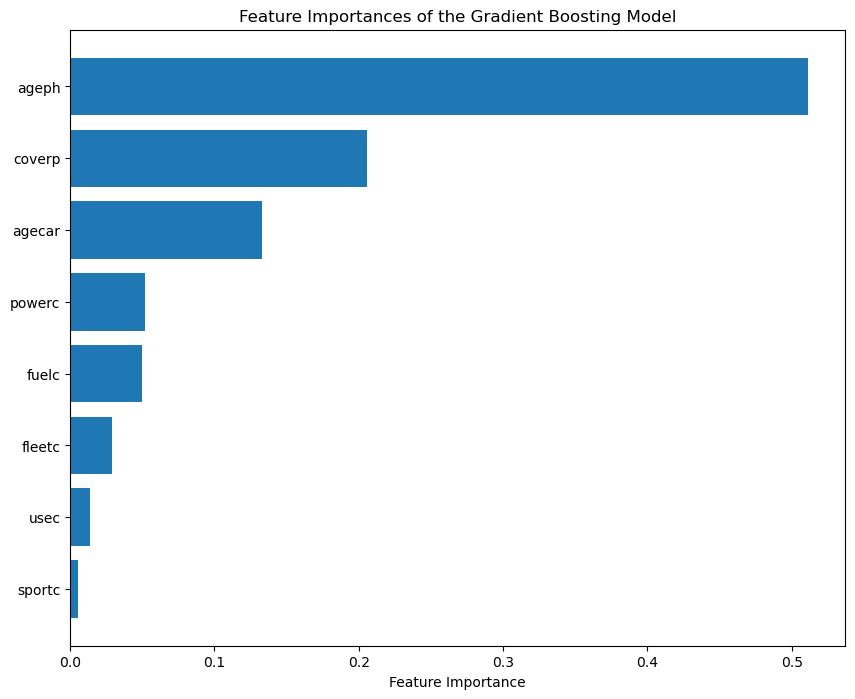

In [76]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importances.index, sorted_feature_importances.values)
plt.xlabel('Feature Importance')
plt.title('Feature Importances of the Gradient Boosting Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

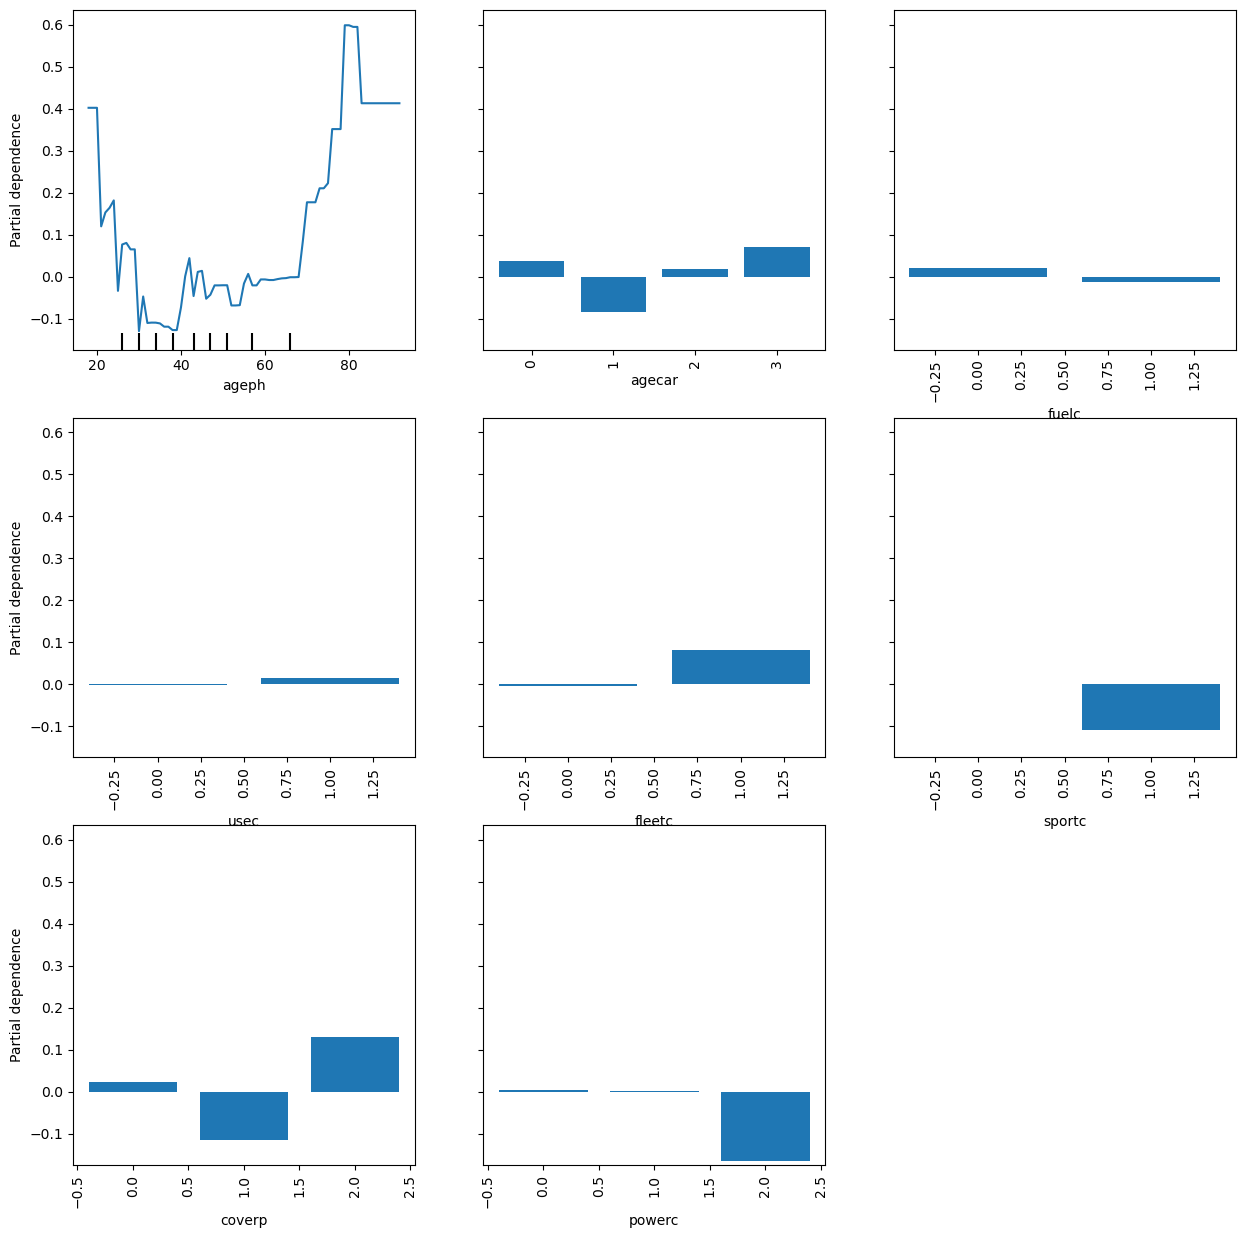

In [68]:
# create pdps for a couple of features
fig, ax = plt.subplots(figsize=(15, 15))
PartialDependenceDisplay.from_estimator(model, X_train, features = columns, categorical_features=categorical_variables, kind='average', ax=ax);

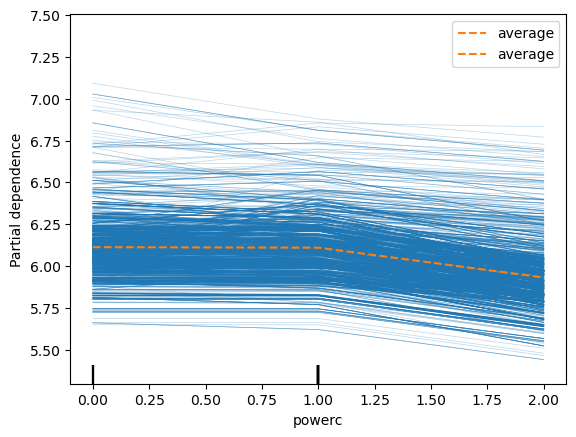

In [65]:
# Compute partial dependence plots and individual conditional expectation
ice = ['powerc']
display = PartialDependenceDisplay.from_estimator(model, X_train, features=ice, kind='both')
display.plot(ax=display.axes_)


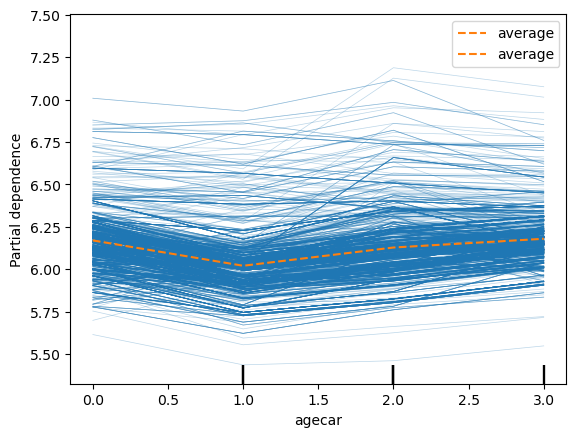

In [77]:
# Compute partial dependence plots and individual conditional expectation
ice = ['agecar']
display = PartialDependenceDisplay.from_estimator(model, X_train, features=ice, kind='both')
display.plot(ax=display.axes_)



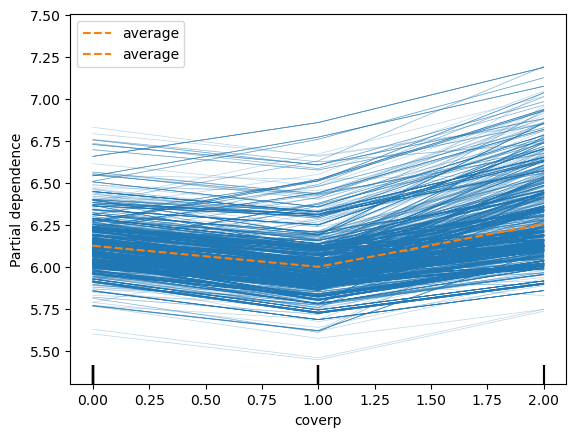

In [85]:
# Compute partial dependence plots and individual conditional expectation
ice = ['coverp']
display = PartialDependenceDisplay.from_estimator(model, X_train, features=ice, kind='both')
display.plot(ax=display.axes_)

ax.set_title("Gradient Boosting - Severity")

display

In [66]:

ice = partial_dependence(model,X_train,features=['powerc'], kind='individual',percentiles=(0,1),grid_resolution=5)
np.shape(ice['individual'])


# for i in range(0,len(X_train)):
#     ice_start = ice['individual'][0][i][-1]
#     ice['individual'][0][i]=ice['individual'][0][i] - ice_start

plt.figure(figsize=(12,8))
age_0_25 = []
age_25_50 = []
age_50_75 = []
age_75_100 = []

for i in range(len(X_train)):
    age = X_train['ageph'].iloc[i]
    if age > 0 and age <= 25:
        age_0_25.append(ice['individual'][0][i])
    elif age > 25 and age <= 50:
        age_25_50.append(ice['individual'][0][i])
    elif age > 50 and age <= 75:
        age_50_75.append(ice['individual'][0][i])
    else:
        age_75_100.append(ice['individual'][0][i])


age_0_25 = pd.DataFrame(age_0_25).mean()
age_25_50 = pd.DataFrame(age_25_50).mean()
age_50_75 = pd.DataFrame(age_50_75).mean()
age_75_100 = pd.DataFrame(age_75_100).mean()

df = pd.DataFrame(index=range(3), columns=range(4))
df.iloc[:,0]= age_0_25
df.iloc[:,1] = age_25_50
df.iloc[:,2]= age_50_75
df.iloc[:,3]= age_75_100



C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\4251963083.py:33: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]= age_0_25
C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\4251963083.py:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = age_25_50
C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\4251963083.py:35: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = 

<Figure size 1200x800 with 0 Axes>

In [36]:
df_reversed = df[::-1]
df_reversed

,0,1,2,3
2,0.000000,0.000000,0.000000,0.000000
1,0.230244,0.190720,0.098751,0.098614
0,0.296379,0.201408,0.078094,-0.049751


In [33]:
df

,0,1,2,3
0,0.296379,0.201408,0.078094,-0.049751
1,0.230244,0.190720,0.098751,0.098614
2,0.000000,0.000000,0.000000,0.000000


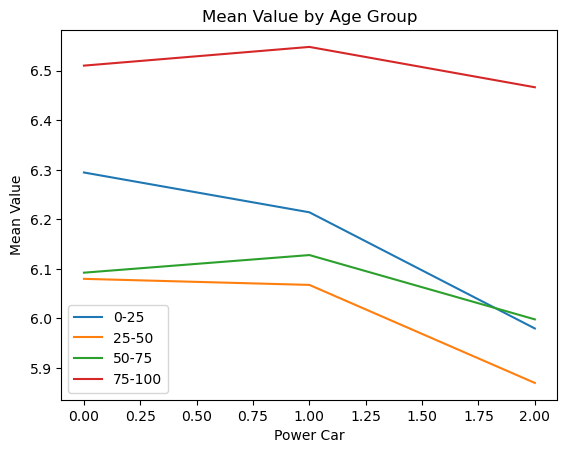

In [69]:
label = ['0-25','25-50','50-75','75-100']
# Plot the DataFrame
for i in range(4):
    plt.plot(df.index, df[i], label=label[i])
# Add labels and legend
plt.xlabel('Power Car')
plt.ylabel('Mean Value')
plt.title('Mean Value by Age Group')
plt.legend()


In [70]:

ice = partial_dependence(model,X_train,features=['coverp'], kind='individual',percentiles=(0,1),grid_resolution=5)
np.shape(ice['individual'])


for i in range(0,len(X_train)):
    ice_start = ice['individual'][0][i][0]
    ice['individual'][0][i]=ice['individual'][0][i] - ice_start

    
plt.figure(figsize=(12,8))
age_0_25 = []
age_25_50 = []
age_50_75 = []
age_75_100 = []

for i in range(len(X_train)):
    age = X_train['ageph'].iloc[i]
    if age > 0 and age <= 25:
        age_0_25.append(ice['individual'][0][i])
    elif age > 25 and age <= 50:
        age_25_50.append(ice['individual'][0][i])
    elif age > 50 and age <= 75:
        age_50_75.append(ice['individual'][0][i])
    else:
        age_75_100.append(ice['individual'][0][i])


age_0_25 = pd.DataFrame(age_0_25).mean()
age_25_50 = pd.DataFrame(age_25_50).mean()
age_50_75 = pd.DataFrame(age_50_75).mean()
age_75_100 = pd.DataFrame(age_75_100).mean()

df = pd.DataFrame(index=range(3), columns=range(4))
df.iloc[:,0]= age_0_25
df.iloc[:,1] = age_25_50
df.iloc[:,2]= age_50_75
df.iloc[:,3]= age_75_100

df

# df_reversed = df[::-1]
# df_reversed

C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\978228164.py:34: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]= age_0_25
C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\978228164.py:35: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = age_25_50
C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\978228164.py:36: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = new

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,0.010260,-0.149030,-0.115017,-0.131951
2,0.496564,0.064702,0.154539,0.188508


<Figure size 1200x800 with 0 Axes>

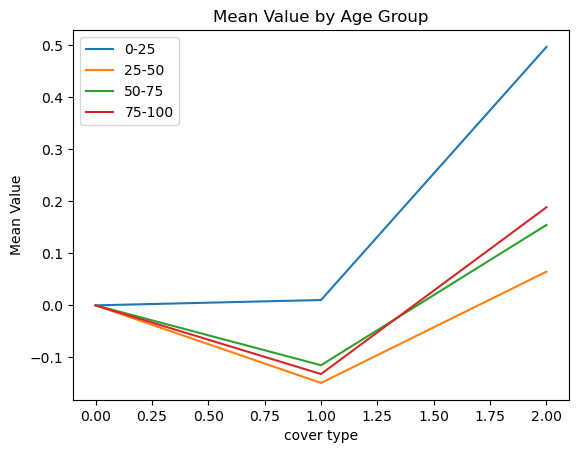

In [71]:
label = ['0-25','25-50','50-75','75-100']
# Plot the DataFrame
for i in range(4):
    plt.plot(df.index, df[i], label=label[i])
# Add labels and legend
plt.xlabel('cover type')
plt.ylabel('Mean Value')
plt.title('Mean Value by Age Group')
plt.legend()


In [109]:
data.head()

,ageph,expo,nclaims,freq,agecar,fuelc,usec,fleetc,sportc,coverp,powerc
0,64,1.000000,0,0.000000,1,1,0,0,0,1,0
1,28,0.046575,1,21.470588,2,1,0,0,0,0,0
2,58,0.402740,0,0.000000,3,1,0,0,0,0,1
3,37,0.169863,0,0.000000,1,1,1,0,0,2,0
4,29,1.000000,0,0.000000,2,1,0,0,0,1,1


In [72]:

ice = partial_dependence(model,X_train,features=['powerc'], kind='individual',percentiles=(0,1),grid_resolution=5)
np.shape(ice['individual'])

for i in range(0,len(X_train)):
    ice_start = ice['individual'][0][i][0]
    ice['individual'][0][i]=ice['individual'][0][i] - ice_start

plt.figure(figsize=(12,8))
sport_yes = []
sport_no = []

for i in range(len(X_train)):
    sport = X_train['sportc'].iloc[i]
    if sport == 1:
        sport_yes.append(ice['individual'][0][i])
    elif sport == 0:
        sport_no.append(ice['individual'][0][i])



sport_yes = pd.DataFrame(sport_yes).mean()
sport_no = pd.DataFrame(sport_no).mean()

df = pd.DataFrame(index=range(3), columns=range(2))
df.iloc[:,0]= sport_no
df.iloc[:,1] = sport_yes

df
# df_reversed = df[::-1]
# df_reversed

C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\1234398017.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]= sport_no
C:\Users\jaspe\AppData\Local\Temp\ipykernel_7936\1234398017.py:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1] = sport_yes


,0,1
0,0.000000,0.000000
1,-0.002860,-0.015270
2,-0.180934,-0.216479


<Figure size 1200x800 with 0 Axes>

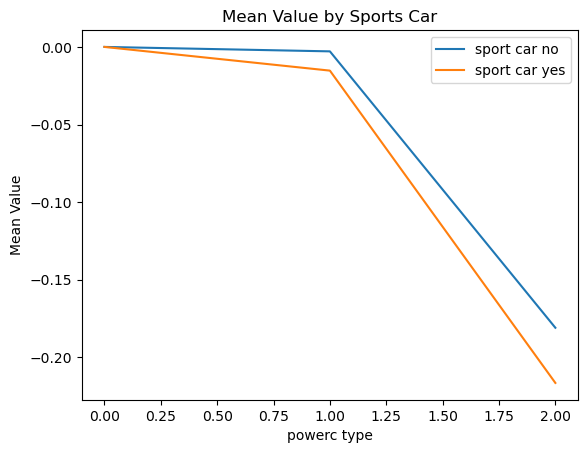

In [73]:
label = ['sport car no','sport car yes']
# Plot the DataFrame
for i in range(2):
    plt.plot(df.index, df[i], label=label[i])
# Add labels and legend
plt.xlabel('powerc type')
plt.ylabel('Mean Value')
plt.title('Mean Value by Sports Car')
plt.legend()
